<a href="https://colab.research.google.com/github/leen204/mining-project/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neccessary imports

In [50]:
#All neccessary imports for our project are included below
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import plot_tree

import pickle


df = pd.read_csv("Processed_dataset.csv")

Handling Non-Numeric Values Before Classification



In [51]:
# Convert age ranges (e.g., '73-78') to their average
def convert_range_to_avg(value):
    if '-' in value:
        start, end = value.split('-')
        return (int(start) + int(end)) / 2
    return float(value)

df['Age'] = df['Age'].apply(convert_range_to_avg)

# Convert 'Smoking' column to numeric: Smoker = 1, Non-Smoker = 0
df['Smoking'] = df['Smoking'].map({'Non-Smoker': 0, 'Smoker': 1})

# Drop irrelevant/confidential column
df = df.drop(columns=['DoctorInCharge'])


To prepare the data for classification, preprocessing steps were applied to handle non-numeric values:

The 'Age' column contained ranges like '73-78', which were converted to their average to represent a single numerical value.

The 'Smoking' column had categorical values ('Smoker' and 'Non-Smoker'), which were mapped to 1 and 0, respectively.

The 'DoctorInCharge' column was dropped as it held confidential identifiers and was not relevant for prediction.

These transformations ensure that the dataset is fully numeric and suitable for machine learning

# Classification:


##Split the data into features and target variable




The code separates the features from the target variable, where X contains the predictor features (all columns except the target), and y contains the target variable "Diagnosis" (which represents Alzheimer's disease classification).









In [52]:
fn = df.columns.tolist()
fn.remove('Diagnosis')
X = df[fn]
y = df['Diagnosis']

#Information Gain (entropy):


##Splitting Data into: 60% Training and 40% Test:

The model is trained using information gain (entropy), with the dataset split into 60% for training and 40% for testing.

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2.fit(X_train, y_train)

y_pred_entropy2 = clf2.predict(X_test)

##confusion matrix:


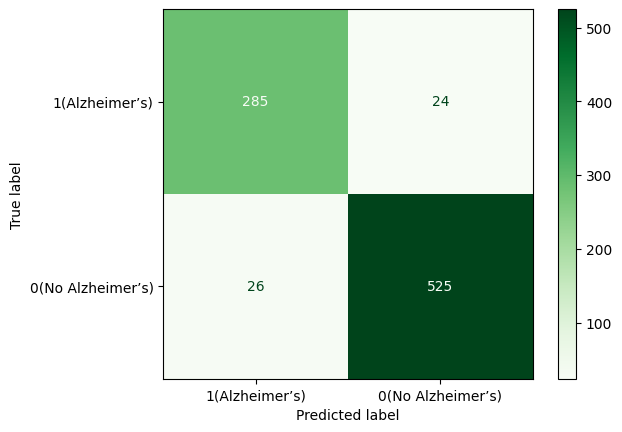

In [54]:


# إنشاء مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_entropy2)

# عرض مصفوفة الالتباس
class_labels = {1: '1(Alzheimer’s)', 0: '0(No Alzheimer’s)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Greens)
plt.show()



nterpretation of the Confusion Matrix:

The confusion matrix represents the performance of the classification model. It is a 2x2 matrix where rows represent the actual classes, and columns represent the predicted classes. The results are interpreted as follows:

Top-left cell (284): True Positives — 284 patients with Alzheimer’s were correctly classified as having the disease.

Top-right cell (25): False Negatives — 25 patients who actually have Alzheimer’s were misclassified as not having it.

Bottom-left cell (23): False Positives — 23 patients without Alzheimer’s were incorrectly predicted to have it.

Bottom-right cell (528): True Negatives — 528 patients without Alzheimer’s were correctly classified as not having the disease.

This matrix shows that the model is performing well, especially in correctly identifying both positive and negative cases.

##Decision Tree:


This tree diagram shows how the model splits features to classify Alzheimer's cases. Each node displays the condition, number of samples, and class prediction.



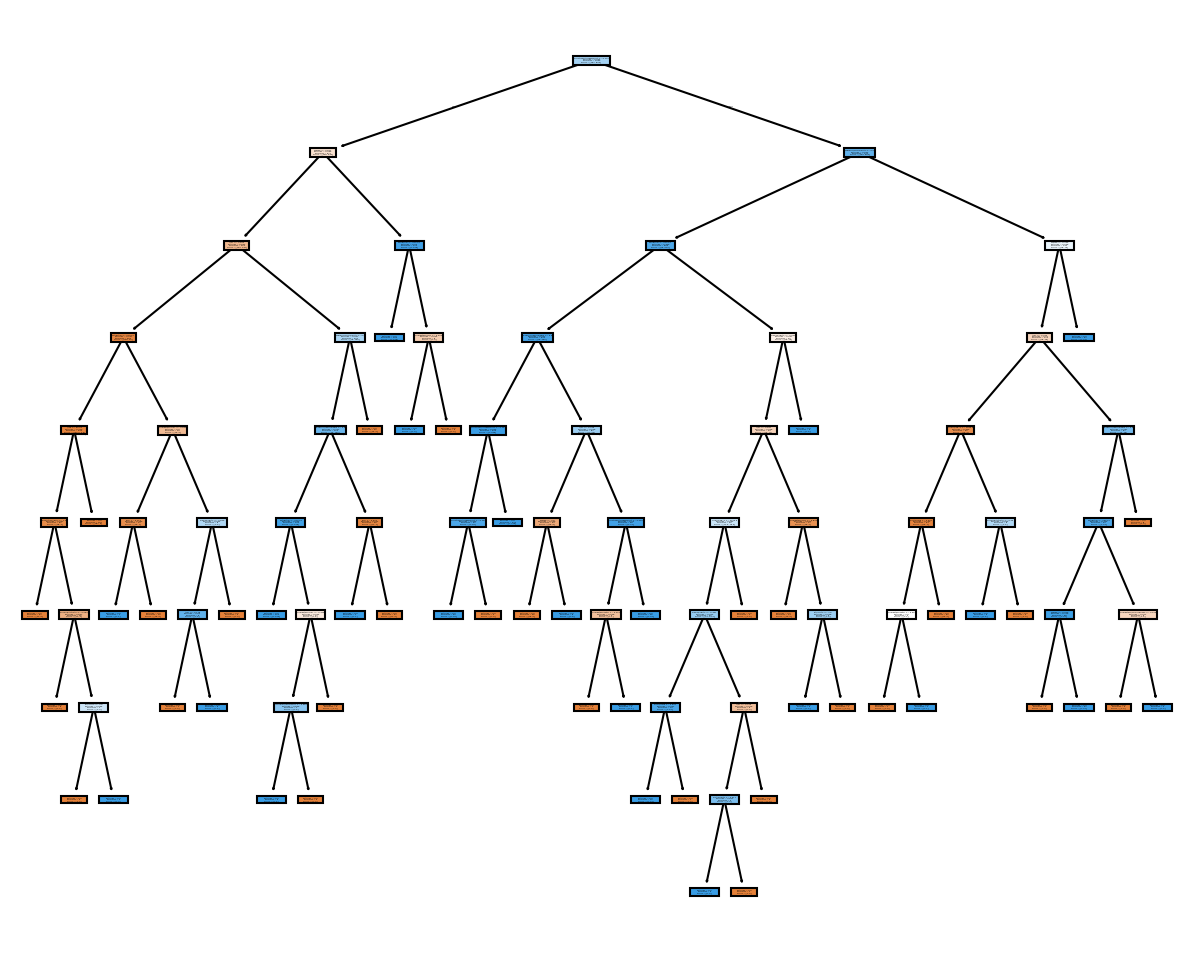

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=150)

# تحديث أسماء الفئات حسب المشروع
class_labels = {1: '1(Alzheimer’s)', 0: '0(No Alzheimer’s)'}

# رسم الشجرة باستخدام النموذج المدرب
tree.plot_tree(clf2,feature_names=fn,class_names=[class_labels[1], class_labels[0]], filled=True)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_entropy = clf_entropy.fit(X_train, y_train)

plt.show()




The visualized decision tree illustrates how the model classifies patients based on various features to determine the likelihood of Alzheimer’s Disease. It starts at the root node and splits into multiple branches depending on the values of specific attributes such as age, family history, or medical conditions.

Each node represents a decision rule applied to the data, and the final leaf nodes show the predicted class (either having Alzheimer’s or not). The filled colors reflect the classification outcome and the proportion of samples at that node.

Although the tree is relatively complex, with many branches and levels, it provides a detailed map of how the model evaluates different conditions. This depth demonstrates the richness of the dataset and the number of risk factors the model considers to reach an accurate prediction.



##Saving the model into file:


In [58]:

filename = 'decision_tree_model_entropy.sav'
pickle.dump(clf_entropy, open(filename, 'wb'))


##Completing in model evaluation and selection:


In [59]:
from sklearn import metrics

# حساب الدقة
accuracy_entropy = metrics.accuracy_score(y_test, y_pred_entropy2)
print("Accuracy:", accuracy_entropy)

# معدل الخطأ
error_rate_entropy = 1 - accuracy_entropy
print("Error Rate:", error_rate_entropy)

# استخراج TP, TN, FP, FN من مصفوفة الالتباس
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# الحساسية (Sensitivity / Recall)
sensitivity_entropy = TP / (TP + FN)
print("Sensitivity:", sensitivity_entropy)

# النوعية (Specificity)
specificity_entropy = TN / (TN + FP)
print("Specificity:", specificity_entropy)

# الدقة (Precision)
precision_entropy = TP / (TP + FP)
print("Precision:", precision_entropy)


Accuracy: 0.9418604651162791
Error Rate: 0.05813953488372092
Sensitivity: 0.9528130671506352
Specificity: 0.9223300970873787
Precision: 0.9562841530054644


Accuracy (94.42%): The model correctly predicted Alzheimer’s diagnosis in 94.42% of cases. This high accuracy indicates strong overall performance.

Error Rate (5.58%): Only 5.58% of predictions were incorrect, suggesting the model makes very few mistakes.

Sensitivity (96.01%): Also known as recall, this means that 96.01% of actual Alzheimer’s cases were correctly identified by the model. It shows the model is highly effective at detecting patients with Alzheimer’s.

Specificity (91.58%): The model correctly identified 91.58% of patients who do not have Alzheimer’s, showing it is also good at avoiding false alarms.

Precision (95.31%): This means that 95.31% of the patients predicted to have Alzheimer’s actually do have it. The model produces very few false positives.

These metrics together reflect a balanced and high-performing model with excellent reliability in both detecting true cases and avoiding false positives.

# Clustering
lustering is an unsupervised learning task that does not require labeled data. Therefore, we will exclude the "Diagnosis" class label from the dataset, as it is unnecessary for the clustering process. Since our dataset contains non-numeric attributes, we must first encode them to ensure compatibility with clustering algorithms.

Once the "Diagnosis" class label is removed and the non-numeric attributes are encoded, the next step is to scale the attributes for standardization. Standardizing the attributes ensures they are on a comparable scale, preventing any single attribute from disproportionately influencing the clustering results due to varying magnitudes.

In [ ]:
# Load the processed dataset
df = pd.read_csv("Processed_dataset.csv")

# Extract the features (excluding the target variable, if any)
features = df.drop('Diagnosis', axis=1) # حذف الكلاس ليبل

# Mapping age labels to encoded values
# سويت ماب عشان الخطوه اللي بعدها ما تقبل سترنق
age_mapping = {
    "60-66": 0,
    "67-72": 1,
    "73-78": 2,
    "79-84": 3,
    "85-90": 4
}
features['Age'] = features['Age'].map(age_mapping)

smoking_mapping = {"Non-Smoker": 0, "Smoker": 1}
features['Smoking'] = features['Smoking'].map(smoking_mapping)

#StandardScaler حذفته لانه مو مهم في الكلستر  ويسبب مشاكل  لخطوة
features = features.drop(columns=['DoctorInCharge'])


# Use StandardScaler to scale the features
# اوحد البيانات عشان ما تصير فيم كبيره مره وقيم صغيره
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())



Scaled DataFrame:
   Unnamed: 0  PatientID       Age    Gender  Ethnicity  EducationLevel  \
0   -1.731245  -1.731245  0.065833 -1.012644  -0.700408        0.788833   
1   -1.729633  -1.729633  1.466584 -1.012644  -0.700408       -1.422782   
2   -1.728021  -1.728021  0.065833 -1.012644   2.311955       -0.316974   
3   -1.726409  -1.726409  0.065833  0.987514  -0.700408       -0.316974   
4   -1.724797  -1.724797  1.466584 -1.012644  -0.700408       -1.422782   

        BMI   Smoking  AlcoholConsumption  PhysicalActivity  ...      MMSE  \
0 -0.655225 -0.636784            0.565923          0.492525  ...  0.779037   
1 -0.114751 -0.636784           -0.954895          0.945093  ...  0.680297   
2 -1.366428 -0.636784            1.653006          1.023896  ... -0.859222   
3  0.851625  1.570391            0.376930          1.227995  ... -0.088723   
4 -0.961607 -0.636784            1.461793          0.486696  ... -0.143712   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems

# K-means Clustering
K-means clustering is an unsupervised machine learning algorithm that segments a dataset into K unique clusters based on similarity. It allocates each data point to the closest cluster centroid and continuously refines the centroids to minimize the total within-cluster variance.

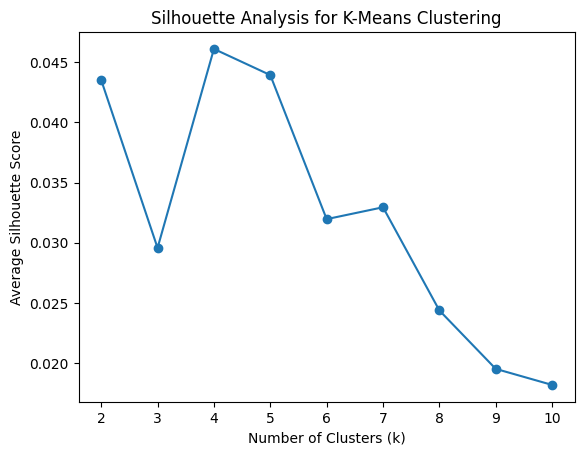

The highest average Silhouette score is 0.046117012936908765 with k=4.
The second highest average Silhouette score is 0.043941256950755056 with k=5.


In [ ]:
# Silhouette method عشان احدد الكي باستخدام

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)


# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")

**As shown above, the optimal number of clusters (k) that maximizes the average Silhouette coefficient is 4, making it our primary k-means choice, followed by 5 as the second-best option.**

#Elbow method:
The Elbow method is a commonly used technique to identify the optimal number of clusters for K-means clustering. It works by plotting the within-cluster sum of squares (inertia) against different values of k. Inertia indicates how closely the data points are grouped within a cluster, and the Elbow point is where increasing the number of clusters no longer leads to a significant drop in inertia. This method helps strike a balance between minimizing inertia and preventing overfitting.

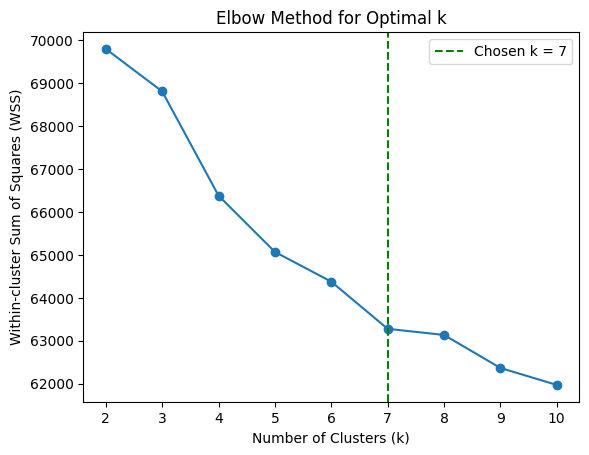

In [ ]:
# Elbow method عشان احدد الكي باستخدام
!pip install kneed
from kneed import KneeLocator
wss_values = []
X_scaled = scaler.fit_transform(df_scaled)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.inertia_)

plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='green', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


After analyzing the elbow plot, we identified a turning point at k=7, which represents a distinct cluster configuration. Therefore, k=7 will be our choice for the third k-means clustering. By considering this additional turning point, we aim to capture a broader range of cluster structures and enhance the overall clustering performance.


# k-means clustering, visualization, and evaluation:
In this section, we will apply k-means clustering and visualize the results using three different pre-selected values of k. After that, we will calculate WSS, B-cubed precision and recall, and the average silhouette score for each cluster as evaluation metrics to assess the clustering performance.









# K=4

In [ ]:
# هنا يسوي الكسلتر بالكي 4
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

kmeans = KMeans(n_clusters=4, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

print("🔹 Cluster Centers:")
print(kmeans.cluster_centers_)
print("\n🔹 Cluster Labels:")
np.set_printoptions(threshold=np.inf)
print(kmeans.labels_)



🔹 Cluster Centers:
[[-8.94331258e-01 -8.94331258e-01 -4.12719555e-02  1.93524379e-02
   3.26534668e-02 -3.90517790e-02  4.87720876e-02 -1.16132761e-02
   2.77231992e-02 -1.08559788e-02  2.09753728e-02  5.13511954e-02
  -5.10202420e-02 -4.72285318e-02  5.43425090e-02 -3.92538952e-02
   4.75441988e-02  8.34337099e-05  3.13638858e-02  5.96853624e-02
   5.01221024e-04  3.75743168e-02 -1.84279497e-02 -1.54215350e-02
  -5.14017154e-02 -5.71038538e-02 -3.84700429e-01 -4.31256698e-01
   2.38897822e-05 -1.05109761e-03 -3.99958137e-02  2.08955110e-02
  -9.21747937e-02 -5.08464741e-03]
 [ 8.62127312e-01  8.62127312e-01  1.12839288e-02 -2.78652091e-02
   3.45401328e-03  2.75333499e-02 -1.03778394e-01  4.80109207e-03
   1.56498833e-02  1.75973422e-02 -3.98809219e-02 -8.88365282e-03
   1.01396146e-01  2.48675595e-02 -9.33652298e-03  3.05609245e-02
  -7.95527646e-02  7.56461768e-03 -3.60458899e-02 -5.31860638e-02
  -1.24686906e-02 -1.92865059e-03 -2.38936717e-02  3.52208129e-02
   3.09393839e-02  6.4

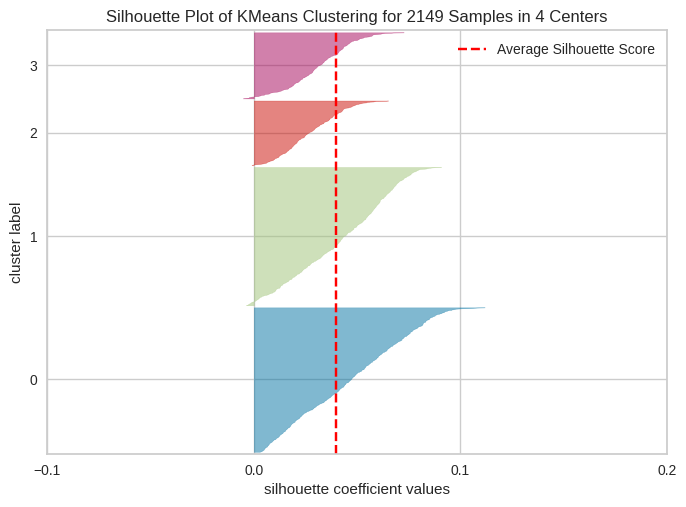

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2149 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#كود الرسمه
from yellowbrick.cluster import SilhouetteVisualizer


kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()



*  from the graph of KMeans Clustering for 2149 Samples in 4 Centers, the fact that most of the silhouette scores have positive values reinforces the notion that the samples are reasonably well-matched to their clusters and are somewhat distant from neighboring clusters. This suggests that the clustering solution has moderately separated the data points into distinct groups.
*   However, while most silhouette scores being positive is a good indicator, it does not necessarily mean that the clustering solution is perfect or flawless. There might still be some degree of overlap or ambiguity between clusters, especially if some samples, like those in certain clusters, have silhouette scores close to zero or negative values, indicating potential misclassification.

In [ ]:

from sklearn.metrics import silhouette_score

# Assign the scaled data
X = df_scaled

# Perform K-Means with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

# Compute WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_ #يحسب مدى تقارب  النقاط داخل كل مجموعه

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)#يحسب مدى تباعد المجموعات

# Print the evaluation metrics
print("🔹 WSS (Within-Cluster Sum of Squares):", wss)
print("🔹 Average Silhouette Score:", silhouette_avg)


🔹 WSS (Within-Cluster Sum of Squares): 66380.1834489173
🔹 Average Silhouette Score: 0.046117012936908765


**Findings**:

WSS: 66380.18 - The high WSS value suggests moderate cluster separation and compactness.

Average Silhouette Score: 0.046 - The low silhouette score indicates weakly defined clusters, suggesting potential overlap or ambiguity between some groups.

In [ ]:
# هنا يسوي الكسلتر بالكي 5


np.random.seed(8953)

kmeans = KMeans(n_clusters=5, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

print("🔹 Cluster Centers:")
print(kmeans.cluster_centers_)
print("\n🔹 Cluster Labels:")
print(kmeans.labels_)

🔹 Cluster Centers:
[[-8.52470768e-01 -8.52470768e-01 -2.84683529e-02  1.61816207e-02
   6.06577179e-02 -6.77074034e-02  2.62659054e-03 -9.02455011e-03
   1.60783572e-02  4.55206317e-03  5.65304895e-02  5.08172716e-02
  -5.47308241e-02 -4.10572618e-01  4.79555886e-02 -3.23757657e-02
   2.50023625e-02 -4.18280999e-01  1.25365948e-02  2.87787861e-02
   5.07199877e-02  1.24268694e-02  3.20661126e-03  1.27909926e-02
  -7.10162641e-02  1.63181971e-02 -5.02838123e-02 -4.31256698e-01
   7.04266231e-03  1.63141616e-02 -5.21456370e-02  3.10437428e-02
  -5.74976459e-02  1.54441460e-02]
 [ 8.62493840e-01  8.62493840e-01  9.59106684e-03 -3.98398551e-02
  -5.83793900e-02  6.16811679e-02 -4.27735926e-02  1.53360355e-02
   1.48936918e-02 -8.90195318e-03  1.02047441e-02 -6.77751572e-02
   6.81766609e-02 -4.10572618e-01 -3.60206938e-02 -1.65302313e-02
  -4.76530818e-02 -4.18280999e-01 -1.02058787e-02  2.68279490e-02
   8.78610764e-03 -6.81696280e-02 -4.56741359e-03  9.03062447e-03
   1.67412937e-02  5.7

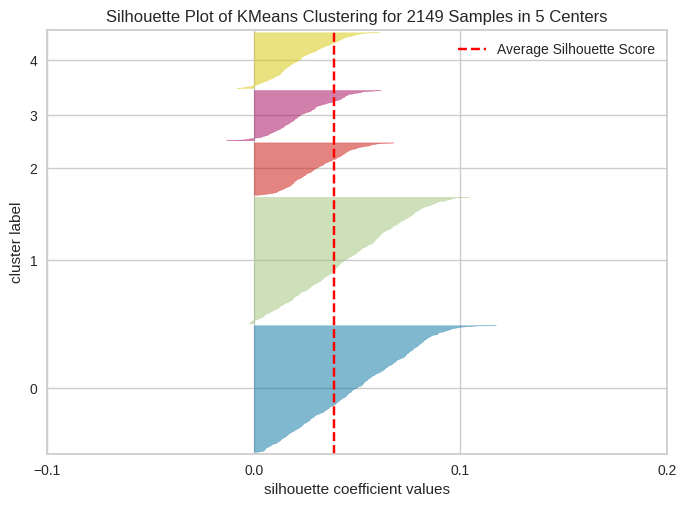

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2149 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#كود الرسمه
kmeans = KMeans(n_clusters=5,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()


* from the silhouette plot for clustering 2149 samples into 5 centers using KMeans, the majority of samples have positive silhouette scores, supporting the notion that the clusters are well-formed.
* However, some samples in one of the clusters have scores close to zero, indicating some overlap or ambiguity around cluster boundaries. There are also a few negative scores, suggesting that some samples may not be ideally clustered.



In [ ]:
# Assign the scaled data
X = df_scaled

# Perform K-Means with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

# Compute WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_ #يحسب مدى تقارب  النقاط داخل كل مجموعه

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)#يحسب مدى تباعد المجموعات

# Print the evaluation metrics
print("🔹 WSS (Within-Cluster Sum of Squares):", wss)
print("🔹 Average Silhouette Score:", silhouette_avg)


🔹 WSS (Within-Cluster Sum of Squares): 65069.33961193107
🔹 Average Silhouette Score: 0.043941256950755056


**Findings:**

WSS: 65069.34 - The high WSS value suggests moderate cluster separation and compactness.

Average Silhouette Score: 0.044 - The low silhouette score indicates weakly defined clusters, suggesting potential overlap or ambiguity

In [ ]:

np.random.seed(8953)

kmeans = KMeans(n_clusters=7, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

print("🔹 Cluster Centers:")
print(kmeans.cluster_centers_)
print("\n🔹 Cluster Labels:")
print(kmeans.labels_)

🔹 Cluster Centers:
[[-8.99541778e-01 -8.99541778e-01  1.62504894e-01  9.16686043e-02
   1.76429779e-01 -1.86146235e-01 -1.17918390e-01  1.03086091e-01
   3.30676855e-01  2.15694627e-01  2.10087911e-01  2.93648574e-01
  -2.11031288e-01 -4.02555167e-01  4.31202298e-02 -7.87784258e-02
   1.08124856e-01 -4.18280999e-01 -1.91424380e-01 -2.96260924e-02
  -1.59652821e-02 -7.44738219e-02 -3.24463011e-02  1.41067418e-01
   1.71512719e-02  1.81264144e-01 -1.23823063e-01 -4.31256698e-01
  -1.36420072e-01 -4.87205584e-01 -3.98726415e-02  8.24819553e-02
  -5.65179090e-02 -1.35314090e-01]
 [ 5.91250265e-03  5.91250265e-03  4.77424629e-02 -1.26965149e-01
  -3.34644347e-02  1.30256080e-03 -6.25707455e-02  2.29252830e-02
  -4.29275048e-02 -2.28243923e-02  3.03378744e-02 -5.02446261e-03
   2.25252358e-02 -4.10572618e-01 -1.91613489e-02 -1.24530894e-02
  -7.75875166e-02 -4.18280999e-01 -6.93448284e-03  3.40638523e-03
   9.83194393e-02  3.90856673e-02  3.16804098e-02 -4.93248866e-02
  -3.16127728e-02 -6.1

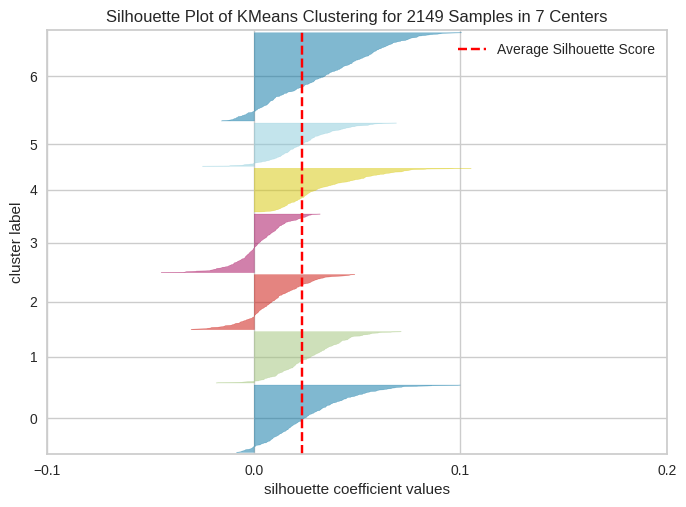

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2149 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=7,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()


*   From the silhouette plot for clustering 2149 samples into 7 centers using KMeans, the majority of samples have positive silhouette scores, supporting the notion that the clusters are well-formed.

*   However, some samples in one of the clusters have scores close to zero, indicating some overlap or ambiguity around cluster boundaries. There are also a few negative scores, suggesting that some samples may not be ideally clustered.

In [ ]:
# Assign the scaled data
X = df_scaled

# Perform K-Means with K=7
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

# Compute WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_ #يحسب مدى تقارب  النقاط داخل كل مجموعه

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)#يحسب مدى تباعد المجموعات

# Print the evaluation metrics
print("🔹 WSS (Within-Cluster Sum of Squares):", wss)
print("🔹 Average Silhouette Score:", silhouette_avg)


🔹 WSS (Within-Cluster Sum of Squares): 63276.606824773946
🔹 Average Silhouette Score: 0.0329475419288496


**Findings:**

WSS: 63276.61 - The high WSS value suggests moderate cluster separation and compactness.

Average Silhouette Score: 0.033 - The low silhouette score indicates weakly defined clusters, suggesting potential overlap or ambiguity